# UTKML Twitter Spam Detection Competition Dataset

In [34]:
dataset = "UTKML Twitter Spam Detection Competition Dataset"

In [35]:
import warnings 
warnings.filterwarnings('ignore')

In [36]:
import pandas as pd

In [37]:
data = pd.read_csv(f'../Datasets/Raw/{dataset}/data.csv')

In [38]:
data.sample(5)

,Tweet,following,followers,actions,is_retweet,location,Type,Unnamed: 7
11061,Russia Insults U.S. War Strategy With Weird C...,605.0,275.0,1100.0,1.0,United States,Spam,NaN
1150,The control freaks that run the planet have de...,13900.0,12300.0,19.0,0.0,the internets,Quality,NaN
9673,NATO approves Israeli representation to its he...,10204.0,11277.0,24740.0,0.0,United States,Spam,NaN
9658,Sorry my man pic.twitter.com/yQ4dSaBwCu,0.0,424000.0,NaN,0.0,"Pennsylvania, USA",Quality,NaN
13224,Evil is what you make it,0.0,0.0,0.0,0.0,"Asbury Park, NJ",Quality,NaN


In [39]:
data.shape

(14899, 8)

In [40]:
data.describe()

,following,followers,actions,is_retweet
count,1.474100e+04,1.488200e+04,11462.000000,14898.000000
mean,4.696292e+03,3.534459e+05,6991.949311,0.249765
std,3.189653e+04,3.890453e+06,15803.881463,0.432892
min,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,13.000000,0.000000
50%,7.400000e+01,8.030000e+02,1495.500000,0.000000
75%,3.025000e+03,1.304975e+04,6692.500000,0.000000
max,1.600000e+06,1.050000e+08,165599.000000,1.000000


In [41]:
data.isna().sum()

Tweet             0
following       158
followers        17
actions        3437
is_retweet        1
location       2011
Type              0
Unnamed: 7    14897
dtype: int64

In [42]:
data.nunique()

Tweet         14682
following      4574
followers      5483
actions        6063
is_retweet        2
location       3437
Type              3
Unnamed: 7        2
dtype: int64

In [43]:
data.drop(columns=['Unnamed: 7'], inplace=True)

In [44]:
data['TEXT'] = None

In [45]:
data = data.drop(columns=['following','followers','actions','is_retweet','location'])

In [46]:
data.nunique()

Tweet    14682
Type         3
TEXT         0
dtype: int64

In [47]:
print(data['Type'].unique())

['Quality' 'Spam' 'South Dakota']


In [48]:
value_to_filter = 'South Dakota'
data = data[data['Type'] != value_to_filter]

In [49]:
data.nunique()

Tweet    14680
Type         2
TEXT         0
dtype: int64

In [50]:
print(data['Type'].unique())

['Quality' 'Spam']


In [51]:
from Preprocessor import preprocess

In [52]:
field = "Tweet"

In [53]:
data

,Tweet,Type,TEXT
0,Good Morning Love @LeeBrown_V,Quality,None
1,'@realDonaldTrump @USNavy RIP TO HEROES',Spam,None
2,Haven't been following the news but I understa...,Quality,None
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,Quality,None
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,Quality,None
...,...,...,...
14894,"#AllWentWrongWhen I told my hair stylist to ""g...",Spam,None
14895,"They don't have to like you, and you don't hav...",Quality,None
14896,#Miami Graham Nash Live at Parker Playhouse #...,Spam,None
14897,@bethannhamilton is in the business of one-upp...,Quality,None


In [54]:
print(data[field][7550:7560])

7550    '@DocDarnell #WhenIWasYoung I never needed any...
7551    He points out Smich mentions throwing someone ...
7553    Highlights from First Presidential Debate http...
7554    #business Pilots for DHL carriers holding stri...
7555    The celebration continues! Park Hours: Disneyl...
7556    Heres what you need to know about the Eric Tru...
7557          No-one wears the white hat anymore #Scandal
7558             Hello you cuntpic.twitter.com/H2Sho3ZBgy
7559    Trump had a human excuse machine last night: P...
7560    San Mateo car crash leaves at least 1 dead htt...
Name: Tweet, dtype: object


In [55]:
for i in range(len(data)):
    data['TEXT'][i] = preprocess(data[field].iloc[i])

In [56]:
data['CLASS']=None
for i in range(len(data)):
    if data['Type'].iloc[i]=="Spam":
        data['CLASS'].iloc[i]=0
    else:
        data['CLASS'].iloc[i]=1

In [57]:
data.sample(5)

,Tweet,Type,TEXT,CLASS
6029,after rampaging through the great challenges a...,Quality,rampag great challeng demon lord dlc last chap...,1
7403,#Miami Banner plane crashes in western Broward...,Spam,miami banner plane crash western broward count...,0
9273,Boneshttps://twitter.com/purposedevonne/status...,Quality,abu jaber shaykh resign replac abu muhammad al...,1
12169,"3 dead, at least 5 sickened after Thanksgiving...",Spam,georg rr martin game throne charact die done h...,0
1986,"If you can be bought, you can be sold. #JimBro...",Spam,bought sold jimbrown http co rgvwwrhho,0


In [58]:
data.isna().sum()

Tweet    0
Type     0
TEXT     2
CLASS    0
dtype: int64

In [59]:
data = data.drop(columns=['Tweet', 'Type'])

In [60]:
data.sample(5)

,TEXT,CLASS
5948,paxton lynch qb,1
12351,regert bid anyway tri explain later,0
7196,julian blackthorn truli love charact dark arti...,1
2683,loui tomlinson im zayn x,1
11586,mbe major bell end alternativeacronyminterpret...,0


In [61]:
data.dropna(inplace=True)

In [62]:
data.isna().sum()

TEXT     0
CLASS    0
dtype: int64

In [63]:
data.to_csv(f'../Datasets/Preprocessed/{dataset}/data.csv') 

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

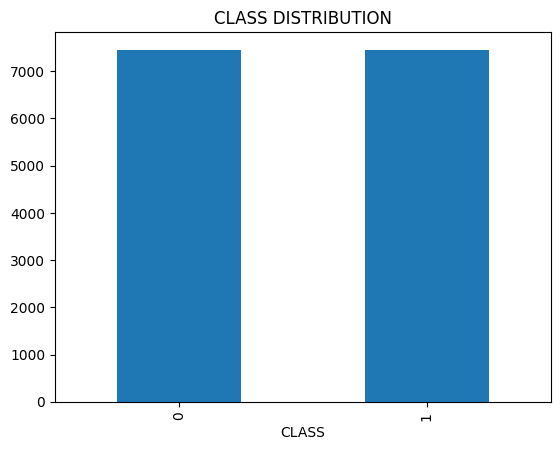

In [65]:
data.groupby('CLASS')['CLASS'].count().plot.bar()
plt.title('CLASS DISTRIBUTION')
plt.show()

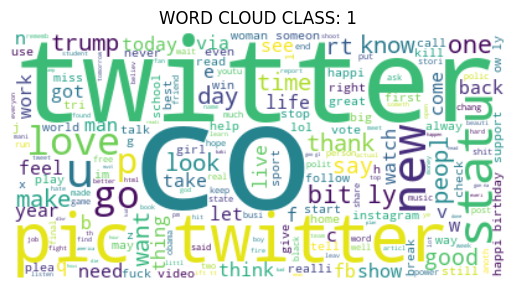

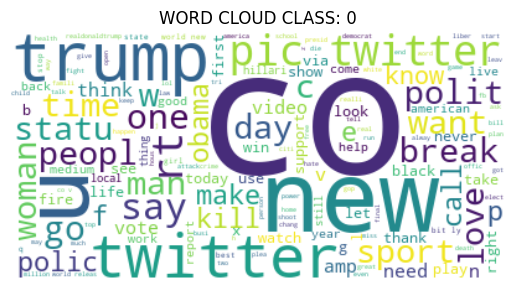

In [66]:
for value in data['CLASS'].unique():
    text = ' '.join(x for x in data[data['CLASS'] == value]['TEXT'])
    wordcloud = WordCloud(background_color="white").generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'WORD CLOUD CLASS: {value}')
    plt.show()